In [82]:
#hello!!

# this is my initial implementation of Word2Vec 
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("train_data.csv")

df

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0
...,...,...
16985,KfW credit line for Uniper could be raised to ...,3
16986,KfW credit line for Uniper could be raised to ...,3
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...,3
16988,Global ESG bond issuance posts H1 dip as supra...,3


In [83]:
df = shuffle(df)
df

,text,label
4244,$CDUAF - Canadian Utilities declares CAD 0.444...,4
3166,Tesla CEO Musk: Sold Bitcoin To Increase Capit...,2
6381,BoE’s Bailey: Returning Inflation To 2% Target...,1
13516,President Biden bumped fists with Saudi Arabia...,16
5441,"$LNG $PTR - Cheniere Energy, PetroChina sign l...",6
...,...,...
2126,Betacom Builds Strong Momentum in 2022 with Ra...,2
11749,"“What we all want is open, free market competi...",15
8711,"‘Russia is blackmailing us,’ European Commissi...",9
5867,Treasury Sec. Yellen warns inflation in the U....,1


In [84]:
text_column = "text"
label_column = "label"

In [85]:
#WORD 2 VEC
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
df["tokens"] = df[text_column].apply(lambda tweet: tokenizer.tokenize(tweet.lower()))
sentences = df["tokens"].tolist()
sentences #this tokenizes them and does a litttle bit of preprocessing, used the one specifically for tweets!

# Word2Vec needs lists of words like this!!

[['$',
  'cduaf',
  '-',
  'canadian',
  'utilities',
  'declares',
  'cad',
  '0.4442',
  'dividend',
  'https://t.co/6wdp1su6h2'],
 ['tesla',
  'ceo',
  'musk',
  ':',
  'sold',
  'bitcoin',
  'to',
  'increase',
  'capital',
  'amid',
  'the',
  'uncertainty',
  'during',
  'chinese',
  'lockdowns',
  ';',
  'have',
  'not',
  'sold',
  'dogecoin'],
 ['boe',
  '’',
  's',
  'bailey',
  ':',
  'returning',
  'inflation',
  'to',
  '2',
  '%',
  'target',
  'sustainably',
  'is',
  'our',
  'job',
  ',',
  '‘',
  'no',
  'ifs',
  'or',
  'buts',
  '’',
  '-',
  'will',
  'act',
  'forcefully',
  'if',
  'necessary',
  ',',
  'be',
  '‘',
  'particularly',
  'alert',
  '’',
  'to',
  'indications',
  'of',
  'more',
  'persistent',
  'inflation',
  'pressures',
  'https://t.co/ougggymlne'],
 ['president',
  'biden',
  'bumped',
  'fists',
  'with',
  'saudi',
  'arabia',
  '’',
  's',
  'crown',
  'prince',
  'mohammed',
  'when',
  'the',
  'two',
  'men',
  'met',
  'for',
  'the',
 

In [86]:
# vector_size is the size of the "description" of numbers that each word has
# window is how many words around each word it looks at
# min_count is the minimum count words have to appear for them to be included
# workers is CPU threads (like in CNN)

from gensim.models import Word2Vec
Word_2_Vec_model = Word2Vec(sentences, vector_size = 100, window = 5, min_count = 2, workers = 4)
Word_2_Vec_model.wv['market']

array([-0.7513448 ,  0.30738515,  0.24384357, -0.10487509,  0.87349176,
       -0.8439511 ,  0.5468634 ,  1.2534726 , -0.15495089, -0.78739464,
       -0.44551978, -0.6153599 , -0.38382098, -0.60538113,  0.65864784,
       -0.24753165,  0.15864563, -0.48518592,  0.73029554, -1.1543385 ,
       -0.32554662,  0.6070286 ,  0.38270873, -0.08252598, -0.2717331 ,
        0.36105856, -0.4868048 , -0.40430796, -0.9855293 ,  0.5872738 ,
        0.9058578 , -0.04932624,  0.1847648 , -1.1542498 , -0.3998709 ,
        0.53378075,  0.08979923,  0.28700805, -0.36219576, -0.6356494 ,
        0.5281193 , -0.3011569 , -0.2506391 ,  0.5967048 ,  0.93742734,
       -0.09022699,  0.0406334 , -0.3950066 ,  0.31858814,  0.13950835,
        0.55313367, -0.7039004 ,  0.18072939, -0.51869804, -0.30995843,
        0.0324499 ,  0.01576548,  0.43316254, -0.12073478,  0.24892892,
        0.09805419, -0.15239292,  0.15703176,  0.11744208, -0.35547975,
        0.48664996,  0.044276  ,  0.63933617, -0.7419098 ,  0.71

In [87]:
my_word = "market"
count = Word_2_Vec_model.wv.get_vecattr(my_word, "count")
count

# this means that market appeared 548 times in my dataset!

np.int64(548)

In [88]:
# now that i have each word as a vector, i want to apply that to each of my words, and then take the average and save that as my "vector" for the entire tweet
X_train = []
for token_array in df["tokens"]:
    # for each tweet: 
    words_tokenized = [] # make a list
    for token in token_array: # for each word in the tweet
        if token in Word_2_Vec_model.wv: # if it's not rare enough and we managed to save it as an array
            words_tokenized.append(Word_2_Vec_model.wv[token]) # add it's token to the list
    if len(words_tokenized) == 0: # if my tweet is so rare that we managed actually no words to get in my model (seems impossible but just in case)
        X_train.append(np.zeros(100)) # this is just gonna be 0 for everything
    else:
        X_train.append(np.mean(words_tokenized, axis = 0)) # if it's not rare, and we were able to get at least one word saved into the model and into words_tokenized, take the average of all of the words and save that as the tweet's token
X_train

[array([-0.11211883,  0.48300028,  0.01976399,  0.03297684, -0.6043796 ,
        -0.71366346, -0.29881263,  0.7575425 , -1.4235548 , -0.05772549,
        -0.01278714, -0.7411274 ,  0.01447699,  1.491414  ,  0.09347015,
        -0.47432008,  0.60573846, -0.4858611 , -0.599534  , -0.9115418 ,
         0.64216346, -0.02051117,  0.7817673 ,  0.15894316, -0.14889123,
         0.10075568, -1.0085629 ,  0.11679054,  0.09270853, -0.7424097 ,
         0.03288458,  0.23824677,  0.37470815, -0.19012117, -0.45511886,
         0.75719935,  0.23917055, -0.78661686, -0.7658938 , -0.8235379 ,
        -0.27956346, -0.6047334 , -0.3535249 ,  0.42495504,  0.18734707,
        -0.0209878 , -1.3678362 , -0.41806433,  0.356532  ,  0.05632373,
        -0.18984   , -0.30081818, -0.62956417,  0.4998036 ,  0.16668458,
        -0.0372911 ,  0.57730806, -0.35698104, -0.01227392,  0.15376495,
         0.6583711 ,  0.11089779,  0.09536164,  0.8617097 , -0.40553173,
         0.7971917 ,  0.29412988,  0.27023453, -0.9

In [89]:
X_train = np.vstack(X_train) # this converts my 1-dimensional array into a 2-dimensional array which i want for processing
y_train = df[label_column].values
X_train

# these are my X and y that i can now use on different things !!

array([[-0.11211883,  0.48300028,  0.01976399, ..., -0.58557087,
         0.39933795,  0.75017697],
       [-0.25773168,  0.37618378,  0.26035914, ..., -0.39716521,
         0.21214142,  0.11101957],
       [-0.30563322,  0.39068729,  0.34744221, ..., -0.26926211,
         0.13341163, -0.07534277],
       ...,
       [-0.31426245,  0.40009126,  0.42328331, ..., -0.34298277,
         0.08076245, -0.2209584 ],
       [-0.51775455,  0.39819098,  0.42393962, ..., -0.15788956,
         0.13267913, -0.13809854],
       [-0.40901986,  0.35188508,  0.43207222, ..., -0.20349042,
         0.25023812,  0.04622617]], shape=(16990, 100))

In [ ]:
# do the same for the "valid_data.csv"
valid_df = pd.read_csv("valid_data.csv")
valid_df = shuffle(valid_df)

valid_df["tokens"] = valid_df[text_column].apply(lambda tweet: tokenizer.tokenize(tweet.lower()))
valid_sentences = valid_df["tokens"].tolist()

valid_Word_2_Vec_model = Word2Vec(valid_sentences, vector_size = 100, window = 5, min_count = 2, workers = 4)

X_test = []
for token_array in df["tokens"]:
    # for each tweet: 
    words_tokenized = [] # make a list
    for token in token_array: # for each word in the tweet
        if token in Word_2_Vec_model.wv: # if it's not rare enough and we managed to save it as an array
            words_tokenized.append(Word_2_Vec_model.wv[token]) # add it's token to the list
    if len(words_tokenized) == 0: # if my tweet is so rare that we managed actually no words to get in my model (seems impossible but just in case)
        X_test.append(np.zeros(100)) # this is just gonna be 0 for everything
    else:
        X_test.append(np.mean(words_tokenized, axis = 0)) # if it's not rare, and we were able to get at least one word saved into the model and into words_tokenized, take the average of all of the words and save that as the tweet's token


X_test = np.vstack(X_test) # this converts my 1-dimensional array into a 2-dimensional array which i want for processing
y_test = df[label_column].values

In [91]:
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.manual_seed(2501)

X_tensor = torch.tensor(X_train, dtype = torch.float32)
y_tensor = torch.tensor(y_train, dtype = torch.long)

train_dataset = TensorDataset(X_tensor, y_tensor)
trainloader = DataLoader(train_dataset, batch_size = 16, shuffle = True)

X_tensor = torch.tensor(X_test, dtype = torch.float32)
y_tensor = torch.tensor(y_test, dtype = torch.long)

test_dataset = TensorDataset(X_tensor, y_tensor)
testloader = DataLoader(train_dataset, batch_size = 16)

In [92]:
print(np.unique(y_train))
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [93]:
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(100, 128) # don't need conv2d when working with 1d arrays !!, this is because i have arrays that are 100 long, and because
        self.fc2 = nn.Linear(128, 64) # 128 and 64 are just hidden layer sizes
        self.fc3 = nn.Linear(64, 20) # in the end i have 20 classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [94]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [95]:
def report_loss_and_accuracy(model, loader, criterion):
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            inputs, labels = data # doing mostly the same stuff so combined the two, used example in CNN notebook
            outputs = model(inputs)

            #computing the loss
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            #computing the accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    #averaging loss
    average_loss = total_loss / total #this is per-sample

    #computing actual accuracy 
    computed_accuracy = 100 * correct / total #this is also per-sample
    return average_loss, computed_accuracy

In [ ]:
save_training_loss = [] # want to save these outside of the loop as to save them for all the epochs
save_test_loss = []
save_training_accuracy = []
save_test_accuracy = []

for epoch in range(50):  # i want to loop 20 times
    running_epoch_loss = 0.0
    running_loss = 0.0
    running_epoch_correct = 0
    running_epoch_total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches (i changed this because i changed the batch size because it was unreasonably slow, even with the test code it was extremely unreasonably slow)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}') # this statement above prints the training loss
            running_loss = 0.0

        # calculate training loss and accuracy and save them
        running_epoch_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_epoch_total += labels.size(0)
        running_epoch_correct += (predicted == labels).sum().item()

    save_training_loss.append(running_epoch_loss / running_epoch_total) #calculating and saving loss and accuracy in the same loop so i only have to run it with the test loader again
    save_training_accuracy.append(100 * running_epoch_correct / running_epoch_total)

    # this is finding the test loss and test accuracy (while not updating the gradient) and saving it 
    epoch_testing_loss, epoch_testing_accuracy = report_loss_and_accuracy(net, testloader, criterion)     
    save_test_loss.append(epoch_testing_loss)
    save_test_accuracy.append(epoch_testing_accuracy)

    print("Training loss: ", save_training_loss[-1], " Test loss: ", save_test_loss[-1], " Training accuracy: ", save_training_accuracy[-1], " Test accuracy: ", save_test_accuracy[-1])

print('Finished Training')

[1,   200] loss: 2.900
[1,   400] loss: 2.667
[1,   600] loss: 2.584
[1,   800] loss: 2.484
[1,  1000] loss: 2.392
Training loss:  0.16197731407899726  Test loss:  0.14595457227037822  Training accuracy:  22.44261330194232  Test accuracy:  30.45909358446145
[2,   200] loss: 2.306
[2,   400] loss: 2.243
[2,   600] loss: 2.178
[2,   800] loss: 2.176
[2,  1000] loss: 2.096
Training loss:  0.13686955802366269  Test loss:  0.128804689242322  Training accuracy:  34.60859329017069  Test accuracy:  38.510888758092996
[3,   200] loss: 2.026
[3,   400] loss: 2.031
[3,   600] loss: 1.964
[3,   800] loss: 1.962
[3,  1000] loss: 1.970
Training loss:  0.12411447997090394  Test loss:  0.11980288461631294  Training accuracy:  41.43025309005297  Test accuracy:  42.901706886403765
[4,   200] loss: 1.898
[4,   400] loss: 1.911
[4,   600] loss: 1.883
[4,   800] loss: 1.859
[4,  1000] loss: 1.860
Training loss:  0.11726697850676408  Test loss:  0.11478378245801067  Training accuracy:  44.34961742201295  Te

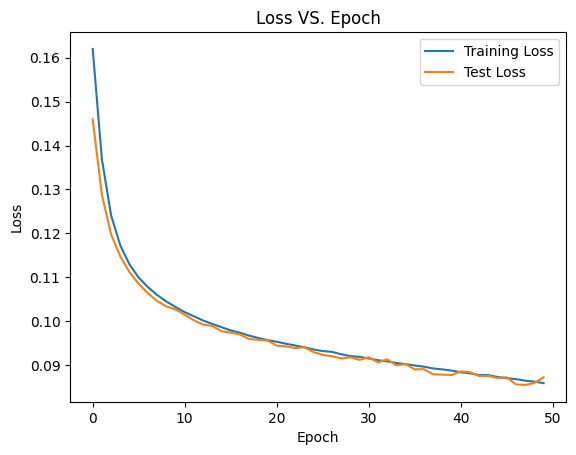

In [98]:
from matplotlib import pyplot as plt
plt.plot(range(50), save_training_loss, label='Training Loss')
plt.plot(range(50), save_test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss VS. Epoch')
plt.legend()
plt.show()

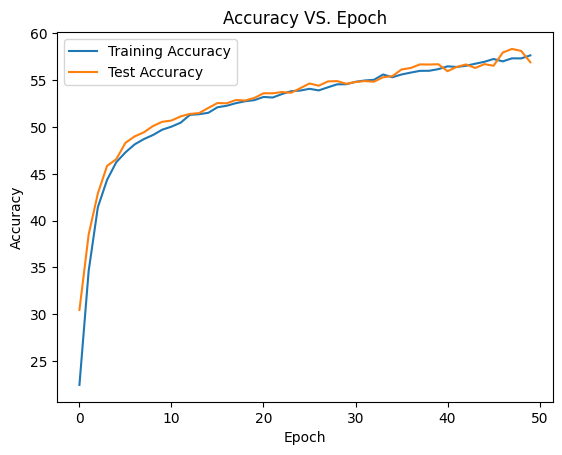

In [99]:
plt.plot(range(50), save_training_accuracy, label='Training Accuracy')
plt.plot(range(50), save_test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy VS. Epoch')
plt.legend()
plt.show()